In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.fftpack
from scipy import stats
import random
from scipy.signal import hilbert
from scipy import interpolate

from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Singular value decomposition
---


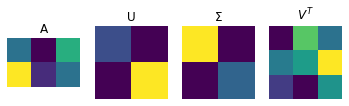

In [2]:

# the matrix
A = [ [3,0,5], [8,1,3] ]

U,S,V = np.linalg.svd(A)

plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V.T)
plt.title('$V^T$')
plt.axis('off')

plt.show()

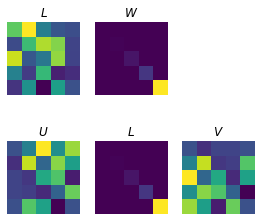

[[ 0.00000000e+00  5.55111512e-17  4.44089210e-16 -3.21097315e-15
  -2.22044605e-16]
 [ 1.11022302e-16  4.44089210e-16  1.66533454e-16  1.11022302e-16
   2.28983499e-15]
 [ 1.11022302e-16 -4.44089210e-16 -1.66533454e-16  3.55271368e-15
   1.88737914e-15]
 [-1.66533454e-16 -2.22044605e-16 -2.22044605e-16 -1.99840144e-15
  -1.22124533e-15]
 [ 1.11022302e-16  5.55111512e-17 -5.55111512e-17  1.44328993e-15
  -4.32986980e-15]]
[[ 0.76509915  0.85331616 -0.86059007 -0.33804373 -0.91514975]
 [ 0.14486308 -0.33654754  0.83310892 -0.01418788 -0.53185193]
 [ 1.07994527  0.17680199 -0.3059108   0.17680199  0.18347221]
 [ 0.35410012 -0.01418788  0.83310892 -0.33654754 -0.96350112]
 [-0.14000973 -0.33804373 -0.86059007  0.85331616  0.00213666]]


In [19]:
#challenge
# create a symmetric matrix(5x5)
# eig (W, L)
# svg (U, S, V)
# images of all matrices
# compare U and V and between U and W
A = np.random.rand(5,5)
A = A@A.T
W, L = np.linalg.eig(A) # w = eigen values, L = eigen vectors
U, S, V = np.linalg.svd(A)

i=np.argsort(W)
W = W[i]
L = L[:,i]

j=np.argsort(S)
S = S[j]
U = U[j,:]
V = V[:,j]

# numbers in subplot meaning https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111 
plt.subplot(241)
plt.imshow(L)
plt.title('$L$')
plt.axis('off')

plt.subplot(242)
plt.imshow(np.diag(W))
plt.title('$W$')
plt.axis('off')


plt.subplot(245)
plt.imshow(U)
plt.title('$U$')
plt.axis('off')

plt.subplot(246)
plt.imshow(np.diag(S))
plt.title('$L$')
plt.axis('off')

plt.subplot(247)
plt.imshow(V)
plt.title('$V$')
plt.axis('off')

plt.show()

# for symmatric matrix - U and V are the same(here, python automatically transposes it)
print(U - np.transpose(V))
# for W and L --> they are the same but sorting must be considered first
# for L and U --> they are the same but the signs may be different.
print(L - U)

In [24]:
# challenge
# create a matrix (3x6 matrix)
np.random.seed(0)
A = np.random.rand(3,6)
# full SVD (variables Us, Ss, Vs)
Us, Ss, Vs = np.linalg.svd(A)
# eig of A.T@A (variables L, V)
L, V = np.linalg.eig(A.T@A)

# confirm that V == Vs
V - Vs
# check the relationship between Ss and L
print(Ss)
print(np.sqrt(L[:3]))
print('')
# create U using only A V and L
U = zeros(3,3)
for i in range(3):
    U[:,i] = (A@V[:,i]) / np.sqrt(L[:3])[i]
print(U)
# confirm that U == Us
print(Us)



[2.47711645 0.84381779 0.27590038]
[2.47711645 0.84381779 0.27590038]

Matrix([[-0.573140291565811, 0.0664965620515302, -0.816754806180645], [-0.668541273018572, 0.538435395264469, 0.512971628257453], [-0.473880546609127, -0.840039006452511, 0.264143323185941]])
[[-0.57314029  0.06649656  0.81675481]
 [-0.66854127  0.5384354  -0.51297163]
 [-0.47388055 -0.84003901 -0.26414332]]


In [48]:
#challenge
m = 4;
A = np.random.rand(m,m)
AtA = A.T@A
AAt = A@A.T

U, S, V = np.linalg.svd(AtA)

diffs = np.zeros((m,1))
for i in range(m):
    diffs[i] = np.sum((AAt@A@U[:,i]) - (A @ U[:,i] * S[i])**2)
print(diffs)

[[-3.12076031e+02]
 [-5.71437862e-02]
 [-3.62385249e-03]
 [-5.12836785e-03]]



---
# VIDEO: Spectral theory of matrices
---


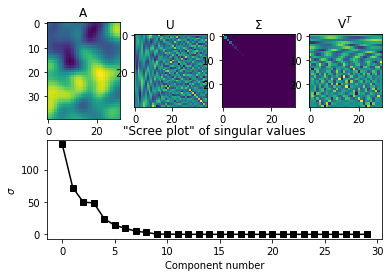

In [50]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

# SVD (note that V comes out transposed, which is different from MATLAB behavior)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()


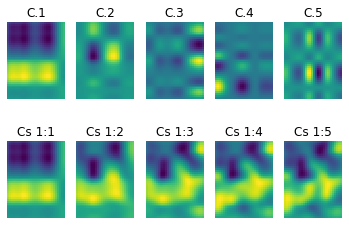

In [53]:
rank1mats = np.zeros((5,m,n))
# print(rank1mats)
for i in range(5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:])
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()


---
# VIDEO: SVD for low-rank approximations
---


rank = 5
error= 10.206908630603863


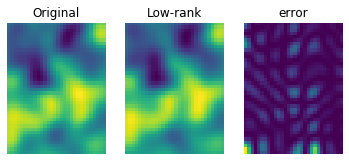

In [57]:

# number of components (singular "layers") to keep
nComps = 5

# reduced vectors
Ur = U[:,0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps,:]

# low-rank apporoximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print( 'rank =',np.linalg.matrix_rank(reconImage) )

# error map and percent difference from original matrix
errormap = (reconImage-A)**2
pctdiff  = 100*np.linalg.norm(reconImage-A)/np.linalg.norm(A)
print('error=', pctdiff)
# print('errorMap=', errormap)
# show the results!
plt.subplot(131)
plt.imshow(A)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage)
plt.axis('off')
plt.title('Low-rank')

plt.subplot(133)
plt.imshow(errormap)
plt.axis('off')
plt.title('error')
plt.show()
   


---
# VIDEO: Convert singular values to percent variance
---


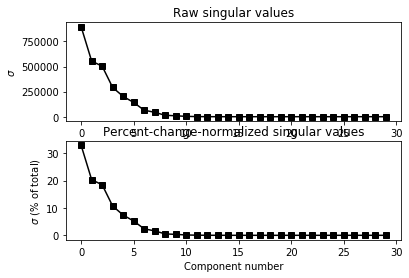

In [58]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

# SVD
U,s,V = np.linalg.svd(A)
s = s * 10000
# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')


plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')
plt.show()

In [78]:
# challenge
# generate a matrix such that U*V is Valid
m = 4
A = np.random.rand(m,m)

print('rank= ',np.linalg.matrix_rank(A))
# norm of U norm of V, and the norm of U*V.T
U, S, V = np.linalg.svd(A)
U = U / np.linalg.norm(U);
V = V / np.linalg.norm(V);
# the norm should be 1
print(np.linalg.norm(U))
print(np.linalg.norm(V))
print(np.linalg.norm(U@V))

# U*U.T, V*V.T, U*V
print(U@U.T)
print(V@V.T)
print(U@V)

# C is not an identity matrix
C = U@V
# but these are all identity matrix
print(C@C.T)
print(C.T@C)

rank=  4
1.0
1.0
0.5000000000000001
[[ 2.50000000e-01 -4.16333634e-17  7.97972799e-17  4.51028104e-17]
 [-4.16333634e-17  2.50000000e-01  3.72965547e-17 -1.73472348e-18]
 [ 7.97972799e-17  3.72965547e-17  2.50000000e-01  2.77555756e-17]
 [ 4.51028104e-17 -1.73472348e-18  2.77555756e-17  2.50000000e-01]]
[[ 2.50000000e-01 -4.16333634e-17  2.08166817e-17  0.00000000e+00]
 [-4.16333634e-17  2.50000000e-01  6.93889390e-18 -1.38777878e-17]
 [ 2.08166817e-17  6.93889390e-18  2.50000000e-01  0.00000000e+00]
 [ 0.00000000e+00 -1.38777878e-17  0.00000000e+00  2.50000000e-01]]
[[-0.10219976  0.13261341 -0.04617307  0.17982475]
 [-0.06653152 -0.01622591  0.23784346  0.03522446]
 [ 0.1981922  -0.03326546  0.03165205  0.14529765]
 [ 0.09137077  0.20867154  0.05288366 -0.08837923]]
[[ 6.25000000e-02  9.54097912e-18  1.73472348e-17  8.67361738e-18]
 [ 9.54097912e-18  6.25000000e-02  2.16840434e-17 -1.73472348e-18]
 [ 1.73472348e-17  2.16840434e-17  6.25000000e-02  1.73472348e-17]
 [ 8.67361738e-18 -1


---
# VIDEO: SVD, matrix inverse, and pseudoinverse
---


In [83]:

# the matrix
A = [ [1,2,3],
      [1,2,4], # hint: change 2->0 for invertible matrix to test
      [1,2,5]  ]
  
# SVD
U,S,V = np.linalg.svd(A)
print(S)
# pseudoinvert S
nonzeroels = S>10**-20 # find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] # invert only those elements
print(S)
print('')
# now pseudoinvert A (note that python produces V^T, hence V.T below is actually V)
Ai = V.T@np.diag(S)@U.T

# it's sortof close to I...?
print( Ai@A )
print('')
# compute with pinv function
print( np.linalg.pinv(A)@A )


[8.03337644e+00 6.81808654e-01 7.41153126e-17]
[1.24480660e-01 1.46668716e+00 1.34924885e+16]

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.00000000e-01  1.00000000e+00  1.50000000e+00]
 [-2.22044605e-16 -4.44089210e-16  1.00000000e+00]]

[[ 2.00000000e-01  4.00000000e-01  2.22044605e-16]
 [ 4.00000000e-01  8.00000000e-01 -2.22044605e-16]
 [-1.11022302e-16 -2.22044605e-16  1.00000000e+00]]



---
# VIDEO: Condition number of a matrix
---


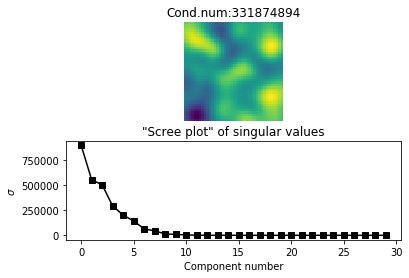

In [84]:

# matrix sizes
m = 40
n = 40
# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = np.random.randn(m,m)
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

# SVD
U,S,V = np.linalg.svd(A)

# compute condition number
condnum = s[0]/s[-1]

# show the matrix
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title('Cond.num:%d' %condnum)

plt.subplot(212)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

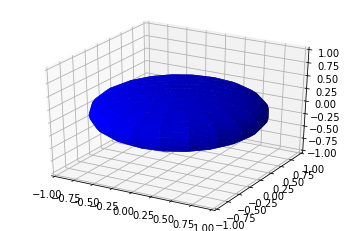

In [85]:
## sphere

# the transformation matrix T
T = np.eye(3)
T[-1,-1] = .5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate( (np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='b')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

In [57]:
#Challenge
# define U, V randomly, set condition number you want, Create a matrix out of these three things.
# plot then in 2x3 form. imshow.
condi = 42
m = 5
n = 3
U = np.random.rand(m,m)
V = np.random.rand(n,n)
Q, R = np.linalg.qr(U)
U = Q
Q, R = np.linalg.qr(V)
V = Q
S = np.zeros((m,n))
diag = np.random.rand(np.minimum(m,n)) * 10
diag[0] = condi
diag[np.minimum(m,n)-1] = 1
np.fill_diagonal(S, diag)
print(S)
print('')
matrix = np.zeros((m,n))
matrix = U @ S @ V.T
print(matrix)
np.linalg.cond(matrix)

[[42.          0.          0.        ]
 [ 0.          1.44088124  0.        ]
 [ 0.          0.          1.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]

[[ 0.9761203   2.21144832  4.14146586]
 [ 4.1400948   5.04165662 19.83388947]
 [ 4.92939733  7.03761299 30.54913151]
 [ 2.60585689  2.25048969  9.72542617]
 [ 2.76740211  3.47035632 13.22580207]]


42.00000000000002